<a href="https://colab.research.google.com/github/withoutJ/StockPrediction/blob/master/predicting_apple_stocks_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
aapl = web.DataReader('AAPL', data_source='yahoo', start='2000-01-01', end='2021-05-20')

aapl_close = aapl['Close']

aapl_close

Date
2000-01-03      0.999442
2000-01-04      0.915179
2000-01-05      0.928571
2000-01-06      0.848214
2000-01-07      0.888393
                 ...    
2021-05-14    127.449997
2021-05-17    126.269997
2021-05-18    124.849998
2021-05-19    124.690002
2021-05-20    127.309998
Name: Close, Length: 5380, dtype: float64

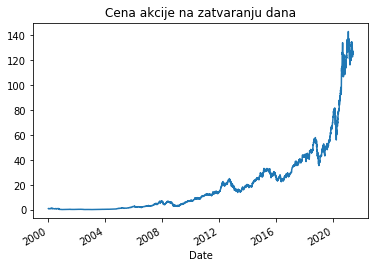

In [ ]:
aapl_close.plot(title='Cena akcije na zatvaranju dana')

In [ ]:
trainingLength = math.ceil(len(aapl_close)*0.8)

trainingLength

4304

In [ ]:
aapl_reshaped = np.array(aapl_close)
aapl_reshaped = np.reshape(aapl_reshaped, (len(aapl_close), 1))

aapl_reshaped

array([[  0.99944198],
       [  0.91517901],
       [  0.92857099],
       ...,
       [124.84999847],
       [124.69000244],
       [127.30999756]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

#scaled_data = scaler.fit_transform(aapl_reshaped)
scaler.fit(aapl_reshaped[0:trainingLength, :])
scaled_data = scaler.transform(aapl_reshaped)


scaled_data


array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [3.77443639],
       [3.76959034],
       [3.84894634]])

In [ ]:
train_data = scaled_data[0:trainingLength, :]

Xtrain = []
Ytrain = []

for i in range(50, len(train_data)):
  Xtrain.append(train_data[i-50:i, 0])
  Ytrain.append(train_data[i, 0])

In [ ]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [ ]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain = np.asarray(Xtrain).astype('float32')
Xtrain.shape

(4254, 50, 1)

In [ ]:
model = models.Sequential()

model.add(layers.Conv1D(16, 3, activation='relu', input_shape=(Xtrain.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Flatten())

model.add(layers.Dense(25))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2, validation_split=0.2)

Epoch 1/200
69/69 - 1s - loss: 0.0033 - val_loss: 0.0021
Epoch 2/200
69/69 - 0s - loss: 4.1944e-04 - val_loss: 0.0020
Epoch 3/200
69/69 - 0s - loss: 3.3728e-04 - val_loss: 0.0012
Epoch 4/200
69/69 - 0s - loss: 2.4124e-04 - val_loss: 9.8121e-04
Epoch 5/200
69/69 - 0s - loss: 1.8746e-04 - val_loss: 8.3701e-04
Epoch 6/200
69/69 - 0s - loss: 1.4576e-04 - val_loss: 8.1233e-04
Epoch 7/200
69/69 - 0s - loss: 1.3821e-04 - val_loss: 7.2392e-04
Epoch 8/200
69/69 - 0s - loss: 1.2005e-04 - val_loss: 6.7112e-04
Epoch 9/200
69/69 - 0s - loss: 1.1212e-04 - val_loss: 0.0015
Epoch 10/200
69/69 - 0s - loss: 1.1674e-04 - val_loss: 7.8884e-04
Epoch 11/200
69/69 - 0s - loss: 1.2256e-04 - val_loss: 0.0017
Epoch 12/200
69/69 - 0s - loss: 1.1748e-04 - val_loss: 6.1173e-04
Epoch 13/200
69/69 - 0s - loss: 1.0669e-04 - val_loss: 6.4465e-04
Epoch 14/200
69/69 - 0s - loss: 1.4326e-04 - val_loss: 0.0010
Epoch 15/200
69/69 - 0s - loss: 1.0954e-04 - val_loss: 0.0013
Epoch 16/200
69/69 - 0s - loss: 1.0761e-04 - val_lo

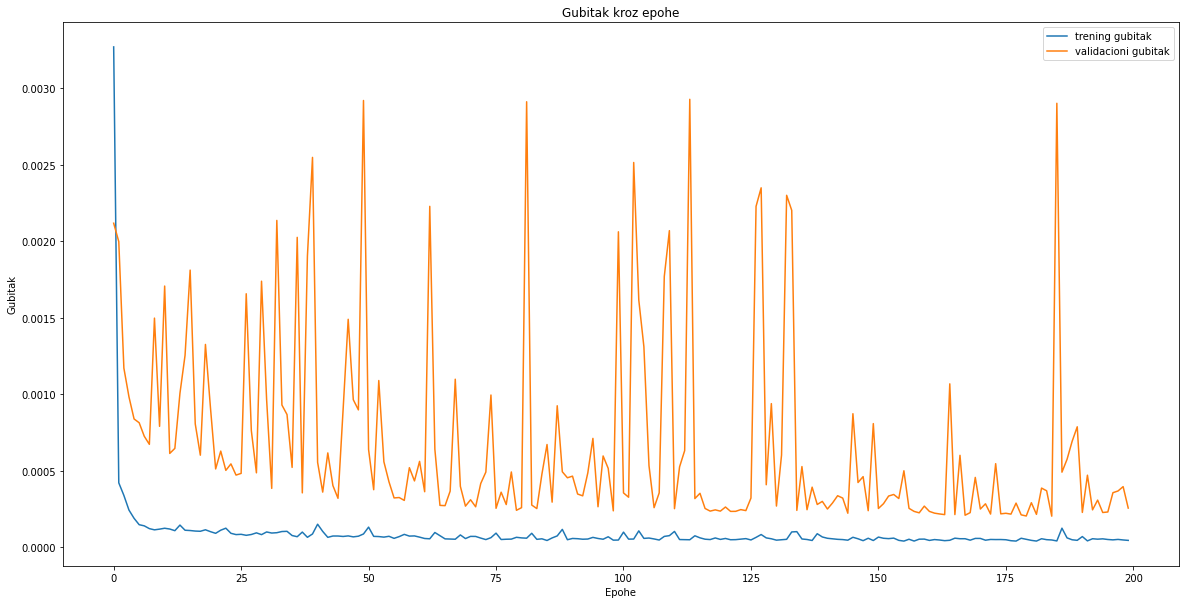

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Gubitak kroz epohe')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Gubitak')
plt.xlabel('Epohe')
plt.legend(['trening gubitak' , 'validacioni gubitak'], loc = 'upper right')
plt.show()

In [ ]:
test_data = scaled_data[trainingLength: , :]


Xtest = []
Ytest = aapl_reshaped[trainingLength+50:, :]
for i in range(50, len(test_data)):
  Xtest.append(test_data[i-50:i, 0])


In [ ]:
Xtest = np.array(Xtest)

Xtest

array([[0.99333647, 1.00219587, 1.01529578, ..., 1.07148113, 1.07019388,
        1.08056769],
       [1.00219587, 1.01529578, 1.01900606, ..., 1.07019388, 1.08056769,
        1.0873069 ],
       [1.01529578, 1.01900606, 1.0177946 , ..., 1.08056769, 1.0873069 ,
        1.08087053],
       ...,
       [3.51728618, 3.66055116, 3.62693102, ..., 3.77807111, 3.85318673,
        3.81744616],
       [3.66055116, 3.62693102, 3.68690234, ..., 3.85318673, 3.81744616,
        3.77443639],
       [3.62693102, 3.68690234, 3.65873392, ..., 3.81744616, 3.77443639,
        3.76959034]])

In [ ]:
Xtest = np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1], 1))

In [ ]:
print(Xtest.shape)

(1026, 50, 1)


In [ ]:
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 35.45375 ],
       [ 35.77768 ],
       [ 35.809116],
       ...,
       [127.111404],
       [127.60283 ],
       [125.84272 ]], dtype=float32)

In [ ]:
print(predictions.shape)

(1026, 1)


In [ ]:
print(predictions.shape)

print(Ytest.shape)

(1026, 1)
(1026, 1)


In [ ]:
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

2.0765355561872085

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


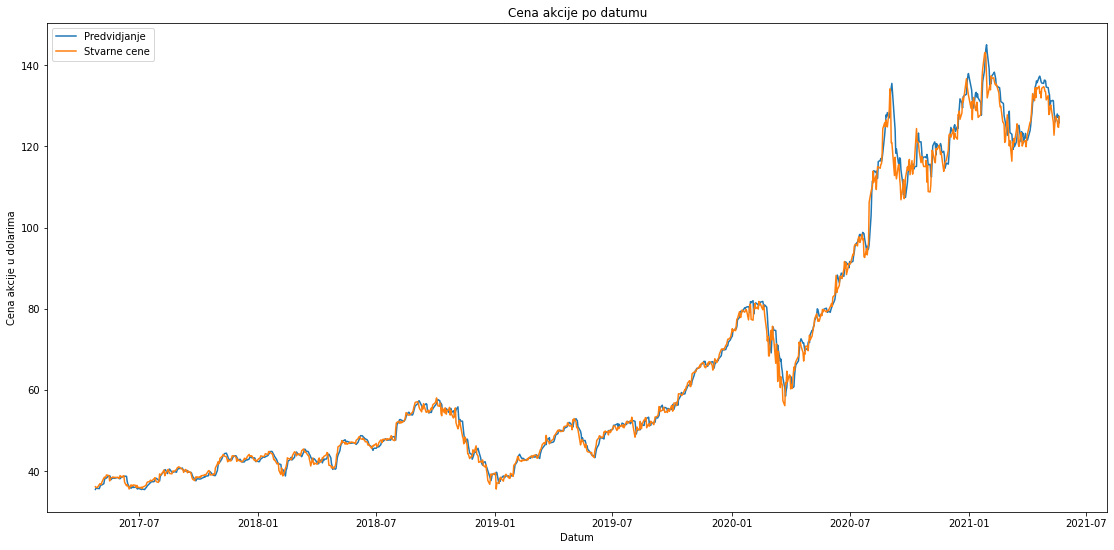

<Figure size 432x288 with 0 Axes>

In [ ]:
aapl1 = aapl[trainingLength+50:]
aapl1['Predictions'] = predictions


plt.figure(figsize=(19,9))
plt.plot(aapl1['Predictions'], label = 'Predvidjanje')
plt.plot(aapl1['Close'], label = 'Stvarne cene')
plt.xlabel('Datum')
plt.ylabel('Cena akcije u dolarima')
plt.title('Cena akcije po datumu')
plt.legend(loc= 'upper left')

plt.show()

plt.savefig('apple_predvidjanje_CNN')